In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Univariate Linear Regression

(1) $Y = a + bX$

(2) $Y = \hat{a} + \hat{b}X + \epsilon$

In [2]:
np.random.seed(42)

def get_observed_x_y(a, b, n):
    x_arr = np.linspace(0, 1, n)
    e = np.random.uniform(-.25, .25, n)
    y = a + b * x_arr + e
    return x_arr, y

def get_true_x_y(a, b, n):
    x_arr = np.linspace(0, 1, n)
    y = a + b * x_arr
    return x_arr, y

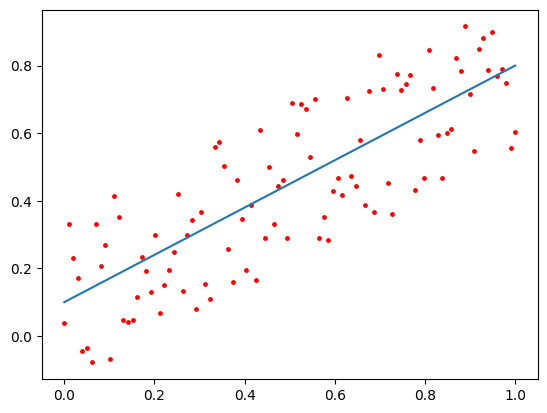

In [3]:
a = 0.1
b = 0.7
n = 100
x_arr, true_y = get_true_x_y(a, b, n)
x_arr, observed_y = get_observed_x_y(a, b, n)
plt.plot(x_arr, true_y)
plt.scatter(x_arr, observed_y, s=6, c='r')
plt.show()

In [4]:
def closed_form_b_hat(x, y):
    return np.cov(x, y)[0, -1] / np.var(x)

def closed_form_a_hat(x, y):
    b_hat = closed_form_b_hat(x, y)
    return np.mean(y) - b_hat * np.mean(x)

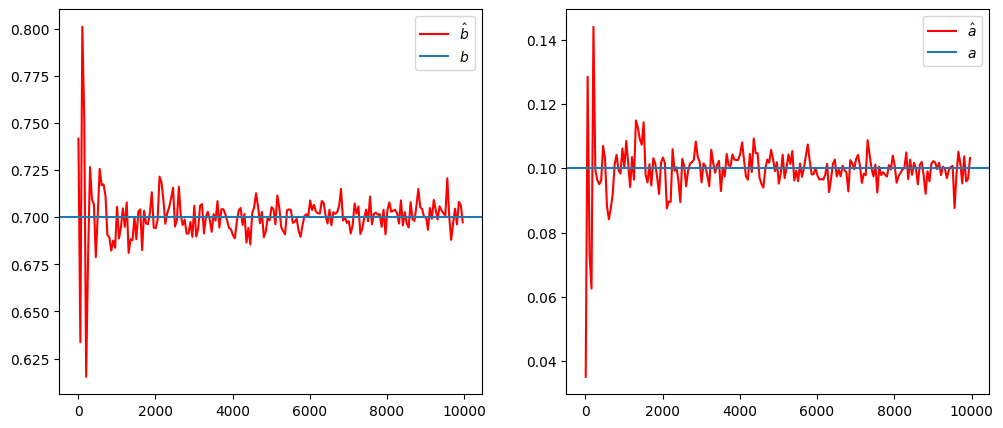

In [5]:
n_obs_arr = list(range(10, 10000, 50))
observed_x_y_arr = [get_observed_x_y(a, b, n=n_i) for n_i in n_obs_arr]
b_hat_arr = [closed_form_b_hat(x[0], x[1]) for x in observed_x_y_arr]
a_hat_arr = [closed_form_a_hat(x[0], x[1]) for x in observed_x_y_arr]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].plot(n_obs_arr, b_hat_arr, label='$\hat{b}$', c='r')
axes[0].axhline(b, label='$b$')
axes[1].plot(n_obs_arr, a_hat_arr,  label='$\hat{a}$', c='r')
axes[1].axhline(a, label='$a$')
axes[0].legend()
axes[1].legend()

In [6]:
reg = LinearRegression(fit_intercept=True).fit(x_arr.reshape(-1, 1), observed_y.reshape(-1, 1))
b_hat = closed_form_b_hat(x_arr, observed_y)
a_hat = closed_form_a_hat(x_arr, observed_y)
pd.DataFrame({'a_hat': [a_hat, reg.intercept_[0]], 'b_hat': [b_hat, reg.coef_[0][0]]}, index=['closed_form', 'reg'])

,a_hat,b_hat
closed_form,0.076380,0.717420
reg,0.079967,0.710246


In [13]:

x_arr, obs_y = zip(*[(-2,3),(-1,2),(0,1),(1,1),(2,0.5)])

In [17]:
closed_form_b_hat(x_arr, obs_y)
closed_form_a_hat(x_arr, obs_y)

a_hat = closed_form_a_hat(x_arr, obs_y)
b_hat = closed_form_b_hat(x_arr, obs_y)

f = lambda x:  a_hat + b_hat * x


-0.75

1.5